# 1. KNN Nearest Algorithm

## Exact Version

## 1. Imports

In [1]:
import numpy as np
from sklearn.datasets import make_classification

In [2]:
# Create a lookup table for squares
squares = np.arange(256)**2

# Create Adder
Adder_Exact = np.arange(-256, 256)[:, np.newaxis] + np.arange(-256, 256)

# Square Root Lookup Table
square_root = np.sqrt(np.arange(0, 255))

# def lookup_table_adder(a, b):
#     return [Adder_Exact[ai + 256, bi + 256] for ai, bi in zip(a, b)]


# def lookup_table_squares(a):
#     return squares[a]

# def lookup_table_diff(a, b):
#     return lookup_table_adder(a, -b)

# def lookup_table_square_root(a):
#     return square_root[lookup_table_adder(a, a)]


# def euclidean_distance(x1, x2):
#     return np.sqrt(np.sum((x1 - x2) ** 2, axis=1))

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Convert numbers to NumPy arrays
a = np.array([5])
b = np.array([1])

# Calculate Euclidean distance
#print("Euclidean distance for Numpy ",euclidean_distance(a, b))
#print("Euclidean distance for Lookup ",euclidean_distance_lookup(a, b))



In [28]:
# def kneighbors(X_test,X_train, return_distance=False,type='numpy',approx_until=3):
#        # Nearest Neighbors to each Test Datapoint
#         n_neighbors = 5
#         dist = []
#         neigh_ind = []
#         number = 0
#         point_dist = []
#         print("Approximating until bit: ",approx_until)
        
#         for x_test in X_test:
#             number +=1
#             if type == 'numpy':
#                 # Your code here
#                 distance = euclidean_distance(x_test, X_train)
#             if type =='lookup':
#                 distance = euclidean_distance_lookup(x_test,X_train)
#             if type =='calc_approx':
#                 distance = euclidean_distance_approx(x_test,X_train,approx_until=approx_until)

#             #print(f"Processed element: {number}")
#             point_dist.append(distance)

#         for row in point_dist:
#             enum_neigh = enumerate(row)
#             sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:n_neighbors]
    
#             ind_list = [tup[0] for tup in sorted_neigh]
#             dist_list = [tup[1] for tup in sorted_neigh]
    
#             dist.append(dist_list)
#             neigh_ind.append(ind_list)
        
#         if return_distance:
#             return np.array(dist), np.array(neigh_ind)
        
#         return np.array(neigh_ind)

# def predict(X_test, X_Train, y_train, weights='uniform',type=type,approx_until=3):
#     class_num = 10

#     if weights == 'uniform':
#         neighbors = kneighbors(X_test, X_Train,type=type,approx_until=approx_until)
#         y_pred = np.array([np.argmax(np.bincount(y_train[neighbor])) for neighbor in neighbors])
#         return y_pred

#     if weights == 'distance':
#         dist, neigh_ind = kneighbors(X_test, X_Train, return_distance=True)
#         inv_dist = 1 / dist
#         mean_inv_dist = inv_dist / np.sum(inv_dist, axis=1)[:, np.newaxis]
#         proba = []

#         for i, row in enumerate(mean_inv_dist):
#             row_pred = y_train[neigh_ind[i]]
#             for k in range(class_num):
#                 indices = np.where(row_pred == k)
#                 prob_ind = np.sum(row[indices])
#                 proba.append(np.array(prob_ind))

#         predict_proba = np.array(proba).reshape(X_test.shape[0], class_num)
#         y_pred = np.array([np.argmax(item) for item in predict_proba])
#         return y_pred


# def score_knn(X_test, y_test, X_train, y_train,type='numpy',approx_until=3):
#     y_pred = predict(X_test, X_train, y_train, weights='distance',type=type,approx_until=approx_until)
#     return float(sum(y_pred == y_test)) / float(len(y_test))
        


In [3]:
class KNN:
    def __init__(self, K=3):
        self.K = K
    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train

    def predict(self, X_test):
        predictions = [] 
        for i in range(len(X_test)):
            dist = np.array([euclidean_distance(X_test[i], x_t) for x_t in   
            self.X_train])
            dist_sorted = dist.argsort()[:self.K]
            neigh_count = {}
            for idx in dist_sorted:
                if self.Y_train[idx] in neigh_count:
                    neigh_count[self.Y_train[idx]] += 1
                else:
                    neigh_count[self.Y_train[idx]] = 1
            sorted_neigh_count = sorted(neigh_count.items(),    
            key=operator.itemgetter(1), reverse=True)
            predictions.append(sorted_neigh_count[0][0]) 
        return predictions

In [56]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## use mnist as classification dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y.astype(np.int8)
subset_size = 2000
X_subset, y_subset = X[:subset_size], y[:subset_size]

# Split the subset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

X_train = X_train.to_numpy(dtype='uint8')
X_test = X_test.to_numpy(dtype='uint8')
y_train = y_train.to_numpy(dtype='uint8')
y_test = y_test.to_numpy(dtype='uint8')

# Print statistics about the data
print("Number of training examples:", X_train.shape[0])
print("Number of testing examples:", X_test.shape[0])
print("Number of features:", X_train.shape[1])  # Assuming all samples have the same number of features
print("Number of classes:", len(set(y)))  # Count unique classes in the target variable



Number of training examples: 1600
Number of testing examples: 400
Number of features: 784
Number of classes: 10


Shape of X_train: (1600, 784)
Shape of y_train: (1600,)


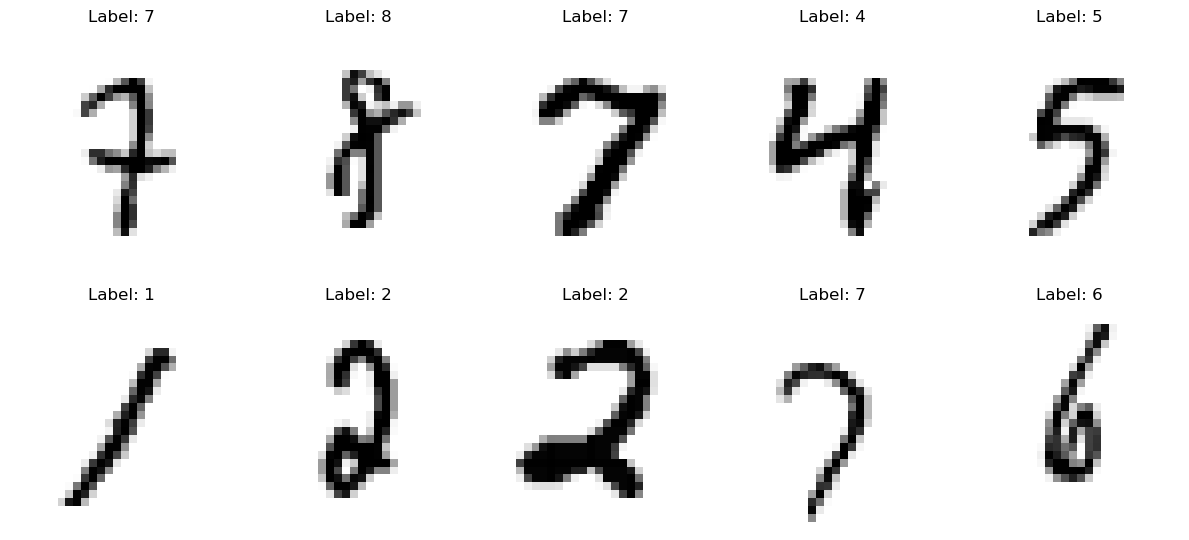

In [7]:
import matplotlib.pyplot as plt

# Check the shape of X_train and y_train
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Visualize the first 10 samples of the dataset
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    if i < len(X_train):
        ax.imshow(X_train[i].reshape(28, 28), cmap='binary')
        ax.set_title(f"Label: {y_train[i]}")
        ax.axis('off')
    else:
        ax.axis('off')  # Turn off the axis for empty subplots

plt.tight_layout()
plt.show()


## Exact KNN Version

K = 2 ; Accuracy: 0.305
K = 4 ; Accuracy: 0.2925
K = 6 ; Accuracy: 0.3025
K = 8 ; Accuracy: 0.265


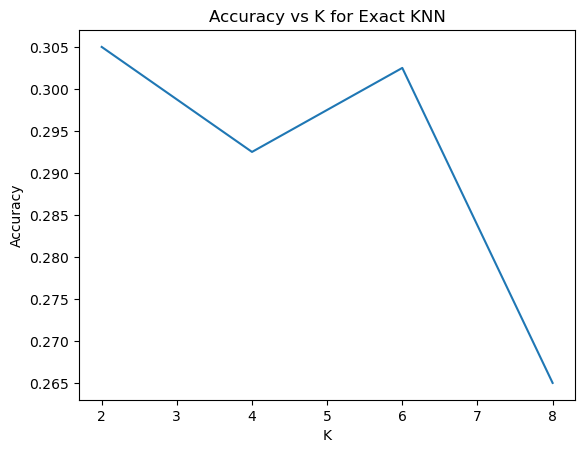

In [8]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import operator
from operator import itemgetter
from joblib import Parallel, delayed
import matplotlib.pyplot as plt

kVals = np.arange(2, 10, 2)
accuracies = []

for k in kVals:
    model = KNN(K=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    accuracies.append(acc)
    print("K =", k, "; Accuracy:", acc)

plt.plot(kVals, accuracies)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K for Exact KNN')
plt.show()

  


## Approximated Version of KNN Algorithm on MNIST

### Approximated Adder Block

In [46]:
import numpy as np
import numpy as np
import operator
import numpy as np
#In 8 Bit Adder, lower 3 bits are implemented approximated. Higher 5 Bit calculate exact
def My_8BitAdder(a,b,approx_until=3):
    # convert to binary
    a_bin, b_bin = bin(a)[2:], bin(b)[2:]

    #reverse order of bytes for the adder
    rev_a , rev_b = list(a_bin[::-1]), list(b_bin[::-1])
    
    rev_a = rev_a + max(0, len(rev_b)-len(rev_a)) * [0]
    rev_b = rev_b + max(0, len(rev_a)-len(rev_b)) * [0]

    carry_over  = 0
    total_sum   = 0

    #we want to do a bitwise addition
    for index, (bit1, bit2) in enumerate( zip(rev_a, rev_b) ):

        if index < approx_until:
            #use approx_adder
            sum_element, carry_over = ApproxAdder(int(bit1), int(bit2), int(carry_over) ) 
        else:
            #use exact_adder
            sum_element, carry_over = ExactAdder(int(bit1), int(bit2), int(carry_over) )
            
        total_sum += pow(2,index)*sum_element

    total_sum += pow(2,index+1)*carry_over

    # If there is an overflow, ignore it
    if total_sum >= 256:
        total_sum -= 256
    return total_sum

def My_8BitSubtractor(a, b,approx_until=3):
    # convert to binary
    a_bin, b_bin = bin(a)[2:].zfill(8), bin(b)[2:].zfill(8)

    # calculate 2's complement of b
    b_bin = ''.join('1' if bit == '0' else '0' for bit in b_bin)
    b_bin = bin(int(b_bin, 2) + 1)[2:].zfill(8)

    # add a and 2's complement of b
    result = My_8BitAdder(int(a_bin, 2), int(b_bin, 2),approx_until)

    # if result is negative (indicated by a leading 1), calculate 2's complement
    if result & (1 << 7):
        result_bin = bin(result)[2:].zfill(8)
        result_bin = ''.join('1' if bit == '0' else '0' for bit in result_bin)
        result = -(int(result_bin, 2) + 1)

    return result

def My_8BitMultiplier(a, b,approx_until=3):
    result = 0
    for _ in range(b):
        result = My_8BitAdder(result, a,approx_until)
    return result

def ApproxAdder(a, b, c):
    if a==0 and b==0 and c==0:
        s=0
        c_out=0
    elif a==0 and b==0 and c==1:
        s=1
        c_out=0
    elif a==0 and b==1 and c==0:
        s=1
        c_out=0
    elif a==0 and b==1 and c==1:
        s=0
        c_out=0
    elif a==1 and b==0 and c==0:
        s=1
        c_out=0
    elif a==1 and b==0 and c==1:
        s=0
        c_out=0
    elif a==1 and b==1 and c==0:
        s=0
        c_out=1
    elif a==1 and b==1 and c==1:
        s=1
        c_out=1
    return s, c_out

def ExactAdder(a, b, c):
    if a==0 and b==0 and c==0:
        s=0
        c_out=0
    elif a==0 and b==0 and c==1:
        s=1
        c_out=0
    elif a==0 and b==1 and c==0:
        s=1
        c_out=0
    elif a==0 and b==1 and c==1:
        s=0
        c_out=1
    elif a==1 and b==0 and c==0:
        s=1
        c_out=0
    elif a==1 and b==0 and c==1:
        s=0
        c_out=1
    elif a==1 and b==1 and c==0:
        s=0
        c_out=1
    elif a==1 and b==1 and c==1:
        s=1
        c_out=1
    return s, c_out



def euclidean_distance_approx(a, b, approx_until=3):
    diff = np.zeros_like(a,dtype='int8')
    square_diff = np.zeros_like(a,dtype='int8')
    for i in range(len(a)):
        diff[i] = My_8BitSubtractor(a[i], b[i], approx_until)
        square_diff = My_8BitMultiplier(diff[i], diff[i], approx_until)
    sum_square_diff = np.sum(square_diff)
    return np.sqrt(sum_square_diff)

class KNNApprox:
    def __init__(self, K=3,approx_until=3):
        self.K = K
        self.approx_until = approx_until
    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train

    def predict(self, X_test):
        predictions = [] 
        for i in range(len(X_test)):
            dist = np.array([euclidean_distance_approx(X_test[i], x_t,approx_until) for x_t in   
            self.X_train])
            print("Element is being processed")
            dist_sorted = dist.argsort()[:self.K]
            neigh_count = {}
            for idx in dist_sorted:
                if self.Y_train[idx] in neigh_count:
                    neigh_count[self.Y_train[idx]] += 1
                else:
                    neigh_count[self.Y_train[idx]] = 1
            sorted_neigh_count = sorted(neigh_count.items(),    
            key=operator.itemgetter(1), reverse=True)
            predictions.append(sorted_neigh_count[0][0]) 
        return predictions

My_8BitSubtractor(3, 1)
My_8BitMultiplier(3, 3)
My_8BitSubtractor(3,1)
My_8BitMultiplier(3,3)

    


1

In [57]:
import numpy as np
from sklearn.datasets import make_classification
from joblib import Parallel, delayed



import matplotlib.pyplot as plt

def calculate_accuracy(approx_until,k):
    model = KNNApprox(K=k, approx_until=approx_until)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    accuracies.append(acc)
    print("K =", k, "; Accuracy:", acc, "; Approx Until:", approx_until)
    return [accuracies,k,approx_until]

# Define the range of approximation levels
approx_until_range = [0, 1, 2, 3, 4, 5]
kVals = np.arange(2, 10, 2)

# Run calculate_accuracy in parallel for each value of approx_until
results = Parallel(n_jobs=-1)(delayed(calculate_accuracy)(approx_until,k) 
                              for approx_until in approx_until_range
                              for k in kVals)

## Plot the results
#plt.figure(figsize=(8, 6))
#for i, approx_until in enumerate(approx_until_range):
#    plt.plot(kVals, results[i], label=f'Approx Until: {approx_until}')
#plt.xlabel('K')
#plt.ylabel('Accuracy')
#plt.title('Accuracy vs K for Different Approximation Levels')
#plt.legend()
#plt.show()


Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
Element is being processed
E